In [2]:
import pandas as pd
from os.path import isfile, join
from os import listdir
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scp

C:\Users\Asus\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Asus\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Asus\anaconda3\lib\site-packages\numpy\.libs\libopenblas.fb5ae2tyxyh2ijrdkgdgq3xbklktf43h.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
datafiles = [join('.\\data', f) for f in listdir('./data') if join('./data', f).endswith(".csv")]

In [4]:
counter = 0
frames = []
IDs = []
for f in datafiles:
    
    if "recall_selection.keys" in pd.read_csv(f):
        df = pd.read_csv(f, converters={'PID': str})
        IDs.append(df["PID"][0])
        frames.append(df)
        counter += 1
print('Number of finished experiments', counter)

Number of finished experiments 9


In [4]:
# trial_type : Guess or Read
# guess_reached.keys : how many guesses (fgh) 0-1-More
# recall_reached.keys : do they recall or not (fg) No - Yes
# recall_selection.key : which letter they chose (just added saving which is which)
# recall_selection.rt : check how long it takes for them generally to select
# living_nonliving.keys : (fg) living/nonliving
# living_nonliving.rt

In [12]:
all_trials = pd.concat(frames,  ignore_index = True).filter(["PID", "Alter", "Geschlecht", "date", "cue", "target", "list_item", 
                                      "trial_type", "guess_reached.keys", "guess_reached.rt",
                                       "test_trials.thisIndex",
                                      "recall_reached.keys", "recall_reached.rt",
                                       "recall_selection.keys", "recall_selection.rt", "correct_choice"])
all_trials["recalled"] = (all_trials["recall_reached.keys"] == 3)
all_trials["corr_recalled"] = (all_trials["correct_choice"] == 1)
all_trials.loc[all_trials["PID"]=="pilot1", "recalled"] = (all_trials["recall_reached.keys"] == 2)

In [13]:
recall = all_trials.loc[all_trials["test_trials.thisIndex"] >= 0]
recall

,PID,Alter,date,cue,target,trial_type,guess_reached.keys,guess_reached.rt,test_trials.thisIndex,recall_reached.keys,recall_reached.rt,recall_selection.keys,recall_selection.rt,correct_choice,recalled,corr_recalled
99,2020,NaN,2025-05-14_18h17.02.827,NaN,NaN,Read,NaN,NaN,0.0,2.0,1.952642,NaN,NaN,0.0,False,False
100,2020,NaN,2025-05-14_18h17.02.827,NaN,NaN,Guess,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,False,False
101,2020,NaN,2025-05-14_18h17.02.827,NaN,NaN,Read,NaN,NaN,0.0,3.0,2.629036,4.0,2.552643,1.0,True,True
102,2020,NaN,2025-05-14_18h17.02.827,NaN,NaN,Guess,NaN,NaN,0.0,3.0,1.857837,NaN,NaN,0.0,True,False
103,2020,NaN,2025-05-14_18h17.02.827,NaN,NaN,Guess,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1580,pilot2,NaN,2025-04-22_13h19.30.422,NaN,NaN,Read,NaN,NaN,0.0,3.0,1.134612,2.0,1.288428,1.0,True,True
1581,pilot2,NaN,2025-04-22_13h19.30.422,NaN,NaN,Read,NaN,NaN,0.0,3.0,1.027452,4.0,1.070106,1.0,True,True
1582,pilot2,NaN,2025-04-22_13h19.30.422,NaN,NaN,Read,NaN,NaN,0.0,2.0,0.411473,NaN,NaN,0.0,False,False
1583,pilot2,NaN,2025-04-22_13h19.30.422,NaN,NaN,Read,NaN,NaN,0.0,3.0,0.901641,3.0,0.989686,1.0,True,True


<Axes: xlabel='guess_reached.keys', ylabel='guess_reached.rt'>

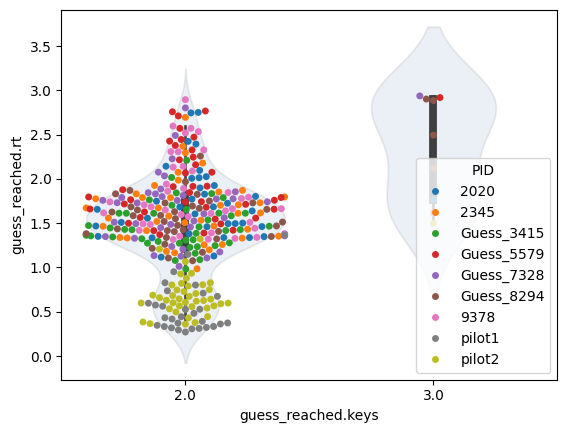

In [21]:
sns.violinplot(data = all_trials, x="guess_reached.keys", y = "guess_reached.rt", alpha=0.1)
sns.swarmplot(data = all_trials, x="guess_reached.keys", y = "guess_reached.rt", hue="PID")

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


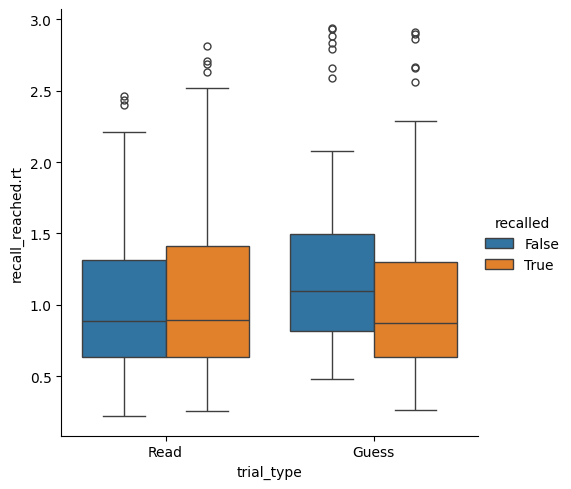

In [8]:
sns.catplot(data = recall, hue = "recalled", kind="box", x="trial_type", y = "recall_reached.rt")

<Axes: xlabel='trial_type', ylabel='recall_selection.rt'>

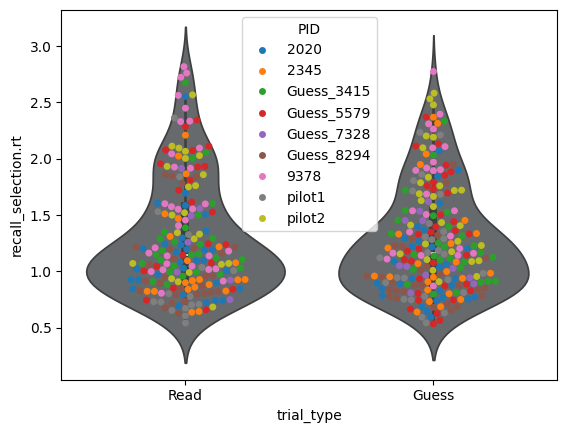

In [6]:
sns.violinplot(data = recall, x="trial_type", y = "recall_selection.rt", saturation=0.05)
sns.swarmplot(data = recall, x="trial_type", y = "recall_selection.rt", hue="PID")

<Axes: xlabel='corr_recalled', ylabel='recall_selection.rt'>

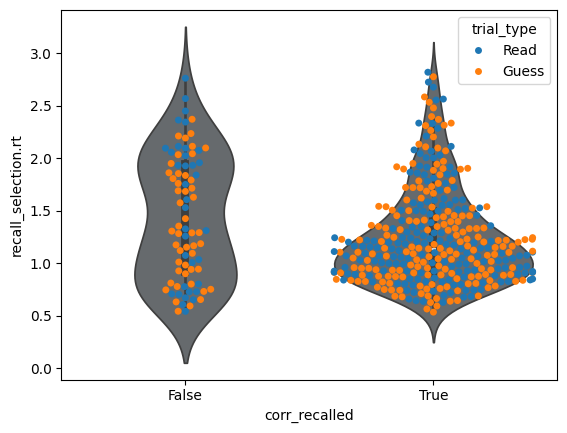

In [9]:
sns.violinplot(data = recall, x="corr_recalled", y = "recall_selection.rt", saturation=0.05)
sns.swarmplot(data = recall, x="corr_recalled", y = "recall_selection.rt", hue="trial_type")

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


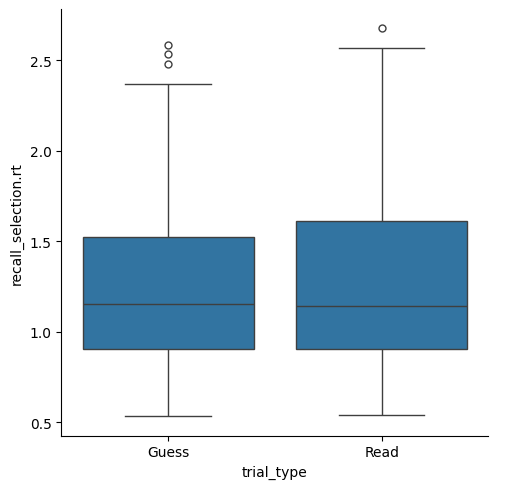

In [21]:
sns.catplot(data = recall,  x="trial_type", y = "recall_selection.rt", kind='box')

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


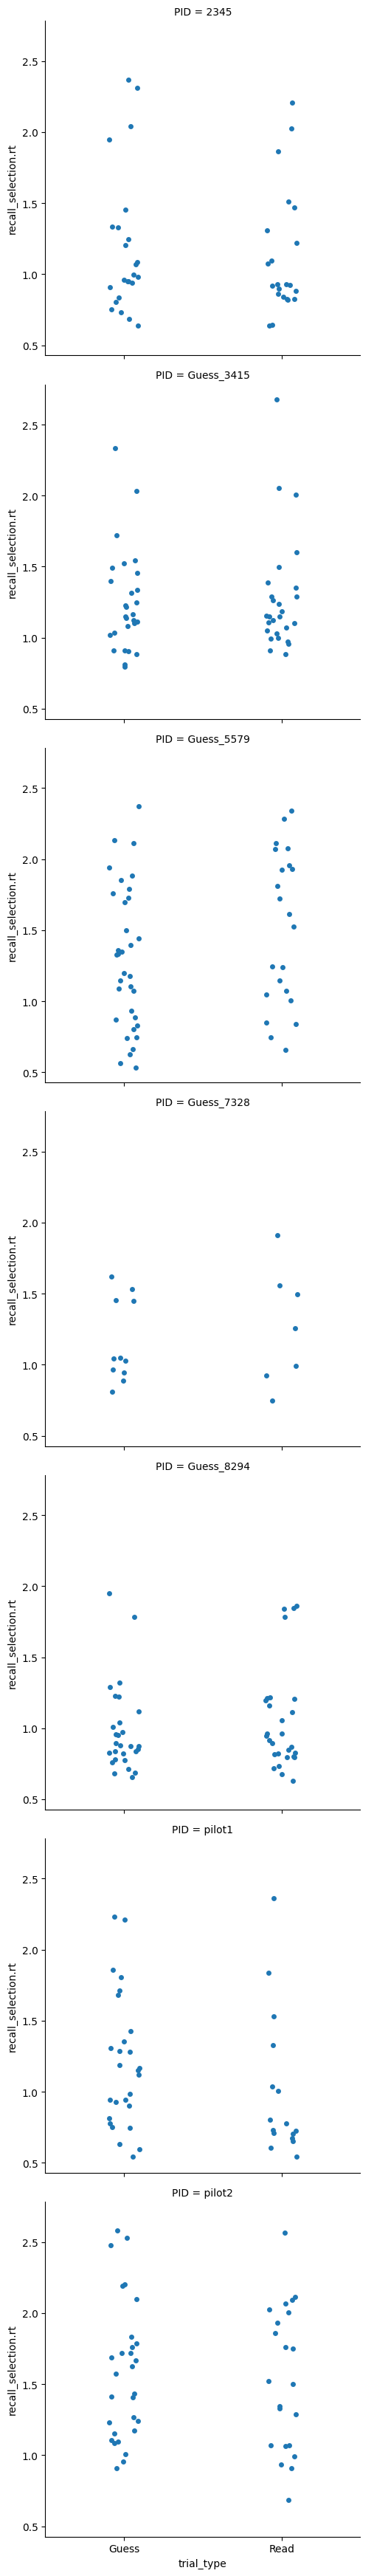

In [14]:
# Note: participant 879824 did not use the numeric keys, but the actual letter keys to select the last letter
sns.catplot(data = recall,  x="trial_type", y = "recall_selection.rt", row="PID")

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


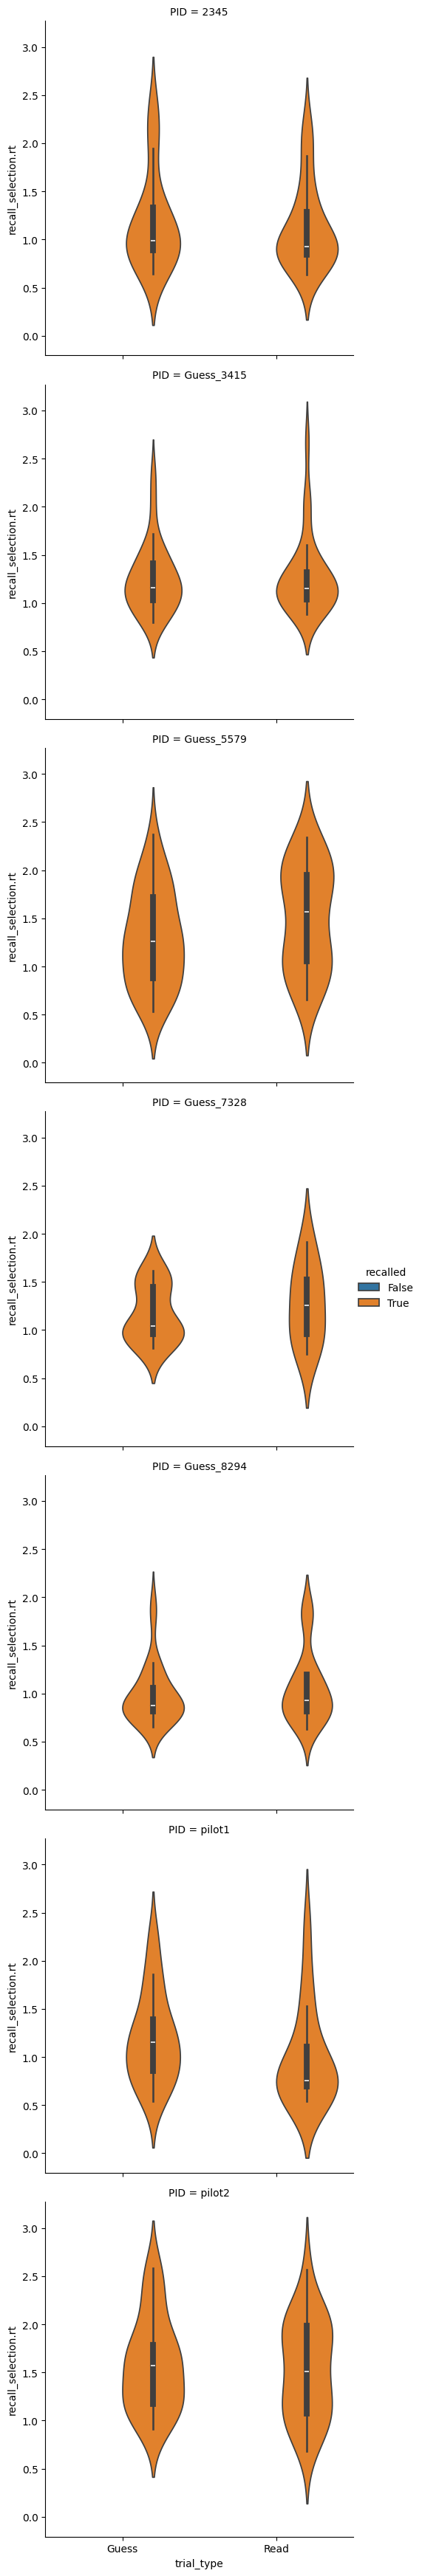

In [16]:
sns.catplot(data = recall, hue = "recalled", kind="violin", x="trial_type", y = "recall_selection.rt", row="PID")

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


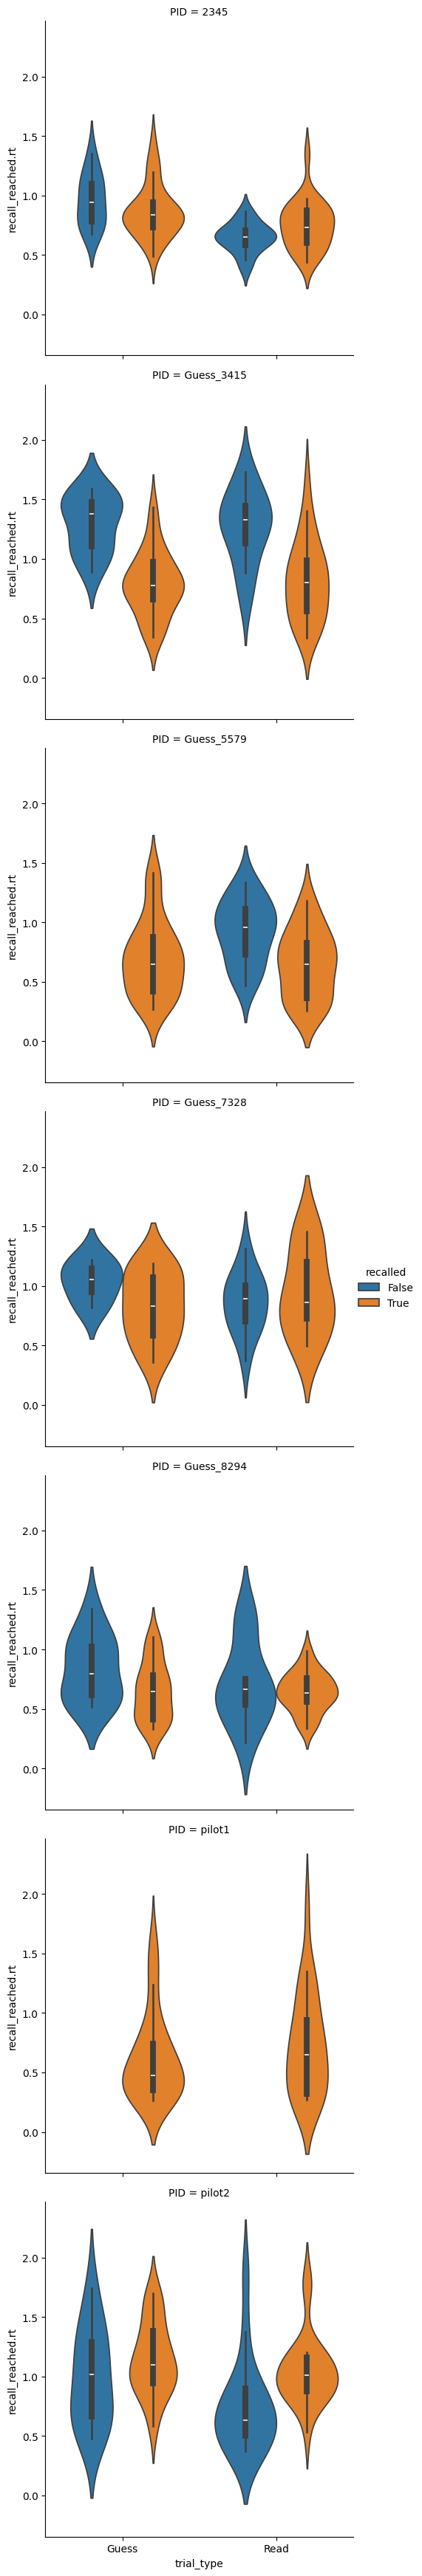

In [15]:
sns.catplot(data = recall, hue = "recalled", kind="violin", x="trial_type", y = "recall_reached.rt", row="PID")

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


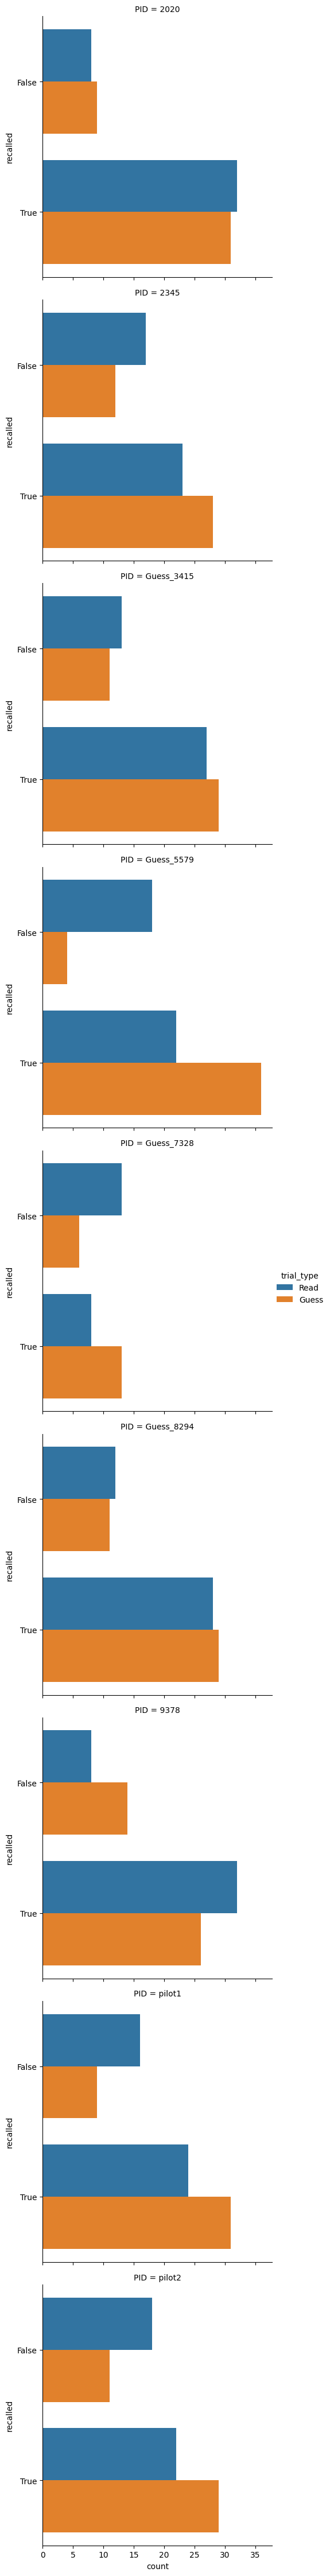

In [10]:
sns.catplot(data = recall, y = "recalled", kind="count", hue="trial_type", row='PID')

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


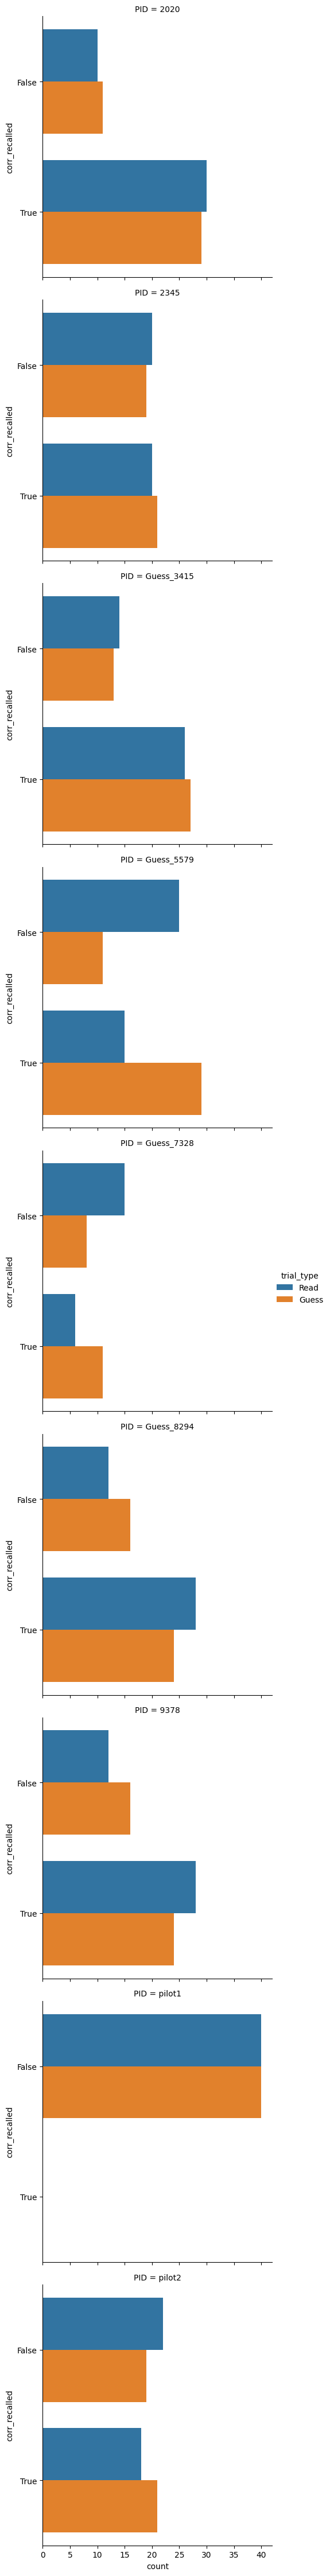

In [7]:
sns.catplot(data = recall, y = "corr_recalled", kind="count", hue="trial_type", row='PID')

In [9]:
recall_sum = pd.crosstab(index=recall['PID'], columns = [recall['trial_type'], recall['recalled']], normalize='index')
recall_sum

trial_type   Guess            Read        
recalled     False   True    False   True 
PID                                       
2345        0.1500  0.3500  0.2125  0.2875
Guess_3415  0.1375  0.3625  0.1625  0.3375
Guess_5579  0.0500  0.4500  0.2250  0.2750
Guess_7328  0.1500  0.3250  0.3250  0.2000
Guess_8294  0.1375  0.3625  0.1500  0.3500
pilot1      0.1125  0.3875  0.2000  0.3000
pilot2      0.1375  0.3625  0.2250  0.2750

In [10]:
scp.ttest_rel(recall_sum['Guess'][True], recall_sum['Read'][True])

TtestResult(statistic=3.8602342481647702, pvalue=0.008360026745444001, df=6)

In [12]:
corr_recall_sum = pd.crosstab(index=recall['PID'], columns = [recall['trial_type'], recall['corr_recalled']], normalize='index')
corr_recall_sum = corr_recall_sum.loc[[True, True, True, True, True,False, True]]
corr_recall_sum

trial_type      Guess            Read        
corr_recalled   False   True    False   True 
PID                                          
2345           0.2375  0.2625  0.2500  0.2500
Guess_3415     0.1625  0.3375  0.1750  0.3250
Guess_5579     0.1375  0.3625  0.3125  0.1875
Guess_7328     0.2000  0.2750  0.3750  0.1500
Guess_8294     0.2000  0.3000  0.1500  0.3500
pilot2         0.2375  0.2625  0.2750  0.2250

In [13]:
scp.ttest_rel(corr_recall_sum['Guess'][True], corr_recall_sum['Read'][True])

TtestResult(statistic=1.542739672426097, pvalue=0.18353840463049628, df=5)